In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

#from sklearn import datasets


In [3]:
data = pd.read_csv('Dataset2d.csv', index_col=0)
data2 = np.log(data.iloc[:, 0:7])
data2['Target'] = data['Target']
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(data[['KLD_Q1','KLD_Q2','KLD_Q4','KLD_Q5','KLD_Q6','KLD_Q7','KLD_Q8','KLD_Q9','KLD_Q10','KLD_Q11','KLD_Q12','KLD_Q13','KLD_Q14','KLD_Q15','KLD_Q16','KLD_Q17']], data['Target'],test_size=0.25, random_state=123456)
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier(n_estimators=100, oob_score=True, random_state=123456)
rf.fit(X_train, y_train)
from sklearn.metrics import accuracy_score

predicted = rf.predict(X_test)
accuracy = accuracy_score(y_test, predicted)

print(f'Out-of-bag score estimate: {rf.oob_score_:.3}')
print(f'Mean accuracy score: {accuracy:.3}')

Out-of-bag score estimate: 0.786
Mean accuracy score: 0.794


<AxesSubplot:>

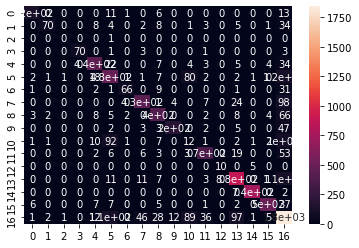

In [4]:
from sklearn.metrics import confusion_matrix

cm = pd.DataFrame(confusion_matrix(y_test, predicted))
sns.heatmap(cm, annot=True)